# check Langleys

In [127]:
import atmPy.radiation.retrievals.langley_calibration as atmlc
import atmPy.radiation.retrievals.spectral_irradiance as atmspec
import atmPy.aerosols.physics.column_optical_properties as atmcop
import helpers

In [128]:
reload(atmspec)
reload(atmspec.atmlangcalib)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [129]:
prefix = '/Users/htelg'

## 649

In [130]:
reload(atmlc)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [131]:
p2fld = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.4/')
lt = atmlc.open_langleys(p2fld)
lt_pre_649 = lt

Text(0.5, 1.0, '1625')

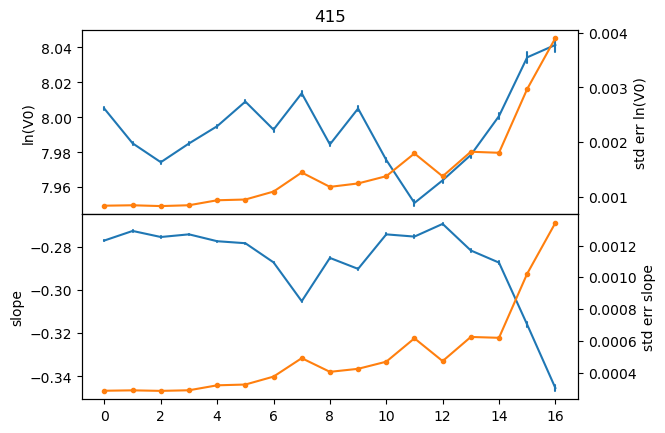

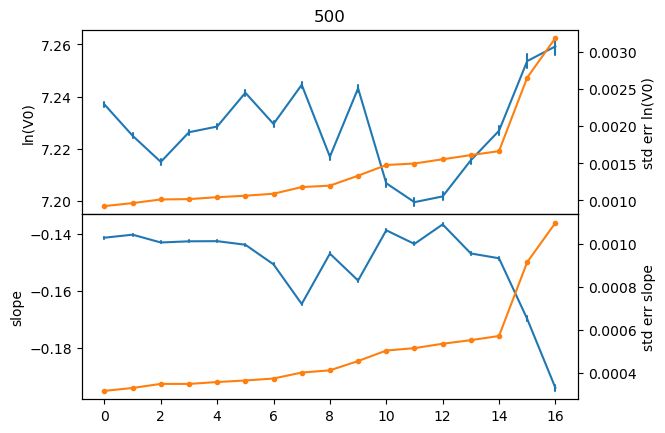

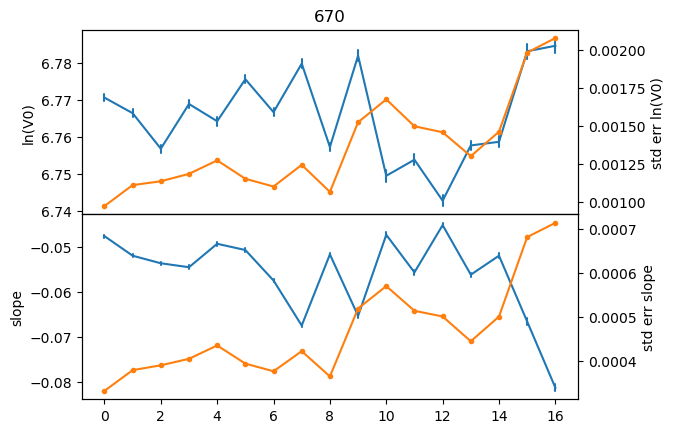

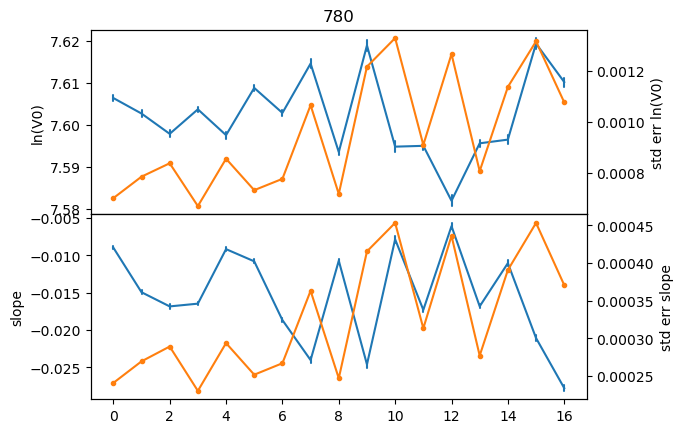

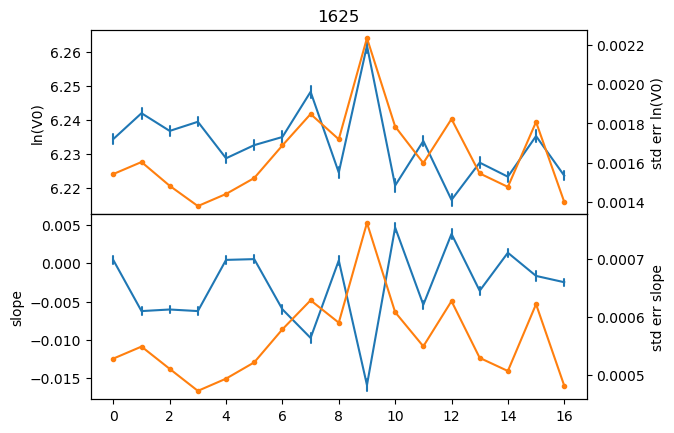

In [132]:
wlsort=500
f,a = lt.plot_sorted(wl = 415, wlsort=wlsort)
a[0].set_title('415')
f,a = lt.plot_sorted(wl = 500, wlsort=wlsort)
a[0].set_title('500')
f,a = lt.plot_sorted(wl = 670, wlsort=wlsort)
a[0].set_title('670')
f,a = lt.plot_sorted(wl = 870, wlsort=wlsort)
a[0].set_title('780')
f,a = lt.plot_sorted(wl = 1625, wlsort=wlsort)
a[0].set_title('1625')

In [7]:
lt.V0_simple

<xarray.Dataset> Size: 336B
Dimensions:                              (wavelength: 6)
Coordinates:
  * wavelength                           (wavelength) int64 48B 415 500 ... 1625
Data variables:
    V0                                   (wavelength) float64 48B 2.942e+03 ....
    V0_std                               (wavelength) float64 48B 72.01 ... 3...
    no_langleys                          (wavelength) int64 48B 10 10 ... 10 10
    one_sided_upper_bound_factor_95conf  (wavelength) float64 48B 1.645 ... 1...
    OD_uncertainty                       (wavelength) float64 48B 0.04527 ......
    V0_stderr                            (wavelength) float64 48B 0.001606 .....

In [8]:
lt.V0_simple.V0_std/lt.V0_simple.V0

<xarray.DataArray (wavelength: 6)> Size: 48B
array([0.02447862, 0.01699333, 0.01091907, 0.00745847, 0.09668877,
       0.00672676])
Coordinates:
  * wavelength  (wavelength) int64 48B 415 500 670 870 940 1625
Attributes:
    description:  nbiased standard deviation, ddof = 1

# create Langles

In [9]:
import atmPy.radiation.retrievals.spectral_irradiance as atmspir

In [10]:
version = '0.4' #this is wehere the langleys go
version_in = '0.1'
"""
changes
-------
0.4
- improved airmass
- improved coordinates and included altitude

0.3
- use cloud screening for cleaning
- removed 940 nm channel in langley cleaning!
0.2
- langleys out to 5 atm
"""
p2fld_lang = f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{{serialno}}.langleys/v{{version}}'
p2fld_lang

'/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{serialno}.langleys/v{version}'

In [11]:
serialno = 649
lt = lt_pre_649
p2fld = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/{serialno}.cal/v{version_in}/')


In [12]:
p2flist = list(p2fld.glob('*'))
p2flist.sort()

In [13]:
p2flist

[PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250921.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250922.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250923.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250924.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250925.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250926.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250927.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250928.nc'),
 PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250929.nc'),
 PosixPath('/Users/htelg/nfs

### 20251018

In [15]:
%matplotlib inline

In [16]:
date = '1018'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

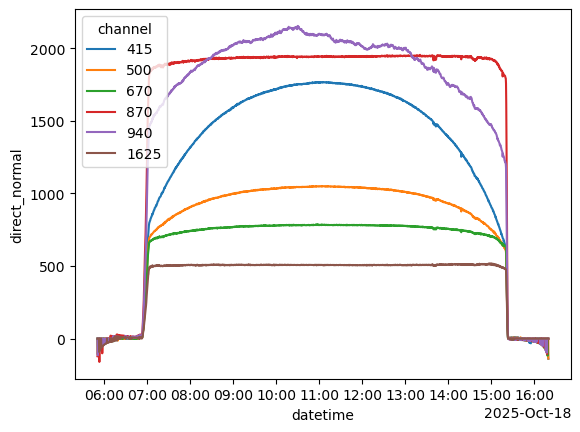

In [17]:
# first glance
f,a = plt.subplots()
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime', ax = a)
# at = a.twinx()
# cm.plot(ax= at)

In [18]:
ds

<xarray.Dataset> Size: 1MB
Dimensions:                   (datetime: 4320, channel: 6)
Coordinates:
  * datetime                  (datetime) datetime64[ns] 35kB 2025-10-18 ... 2...
  * channel                   (channel) int64 48B 415 500 670 870 940 1625
Data variables:
    alltime                   (datetime, channel) int64 207kB ...
    global_horizontal         (datetime, channel) float64 207kB ...
    diffuse_horizontal        (datetime, channel) float64 207kB ...
    channel_wavelength        (channel) float64 48B ...
    direct_horizontal         (datetime, channel) float64 207kB ...
    cosine_calibraion_direct  (datetime, channel) float64 207kB ...
    solar_zenith_angle        (datetime) float64 35kB ...
    solar_azimuth_angle       (datetime) float64 35kB ...
    direct_normal             (datetime, channel) float64 207kB ...
Attributes: (12/17)
    site_longitude:         -350.161743
    site_latitude:          46.807251
    site_elevation:         0
    site:                   TMP
    site_name:              unknown
    calibrated_irradiance:  False
    ...                     ...
    instrument_type:        mfrsr
    day_complete:           True
    parent_files:           /Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/...
    product_version:        0.1
    calibrated_spectral:    True
    clalibration_cosine:    True

In [19]:
out = helpers.get_langleys(ds, fnmet, 
                                        None,
                                        # lt,     
                                        langley_airmass_limits=(2.5, 4.3),
                                        clean = False,
                                        # test = True
                                       )
lang_am, lang_pm = out
# self = out['sir']

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


In [20]:
if 0:
    lang_am.langleys = lang_am.langleys.dropna()
    
    lang_am = lang_am.clean(threshold=2.5, 
                  # use_channels=[500,]
                 )['langley']
if 0:
    lang_pm.langleys = lang_pm.langleys.dropna()
    
    lang_pm = lang_pm.clean(threshold=3, 
                  # use_channels=[500,]
                 )['langley']

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

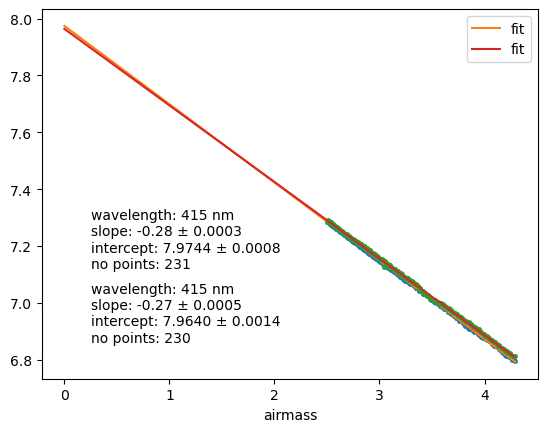

In [21]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, 
             ax = a
            )

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

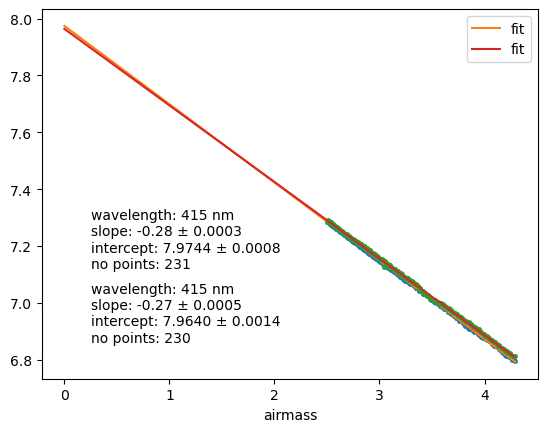

In [22]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, 
             ax = a
            )

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

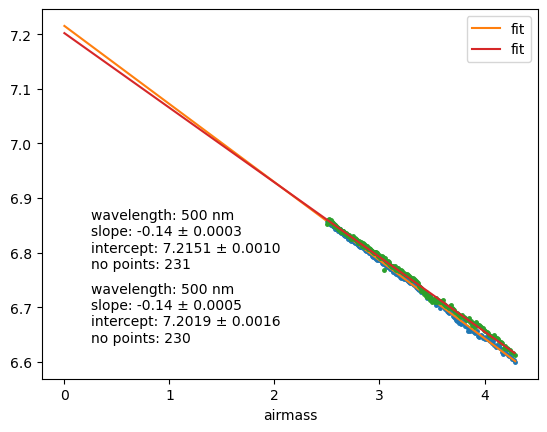

In [23]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

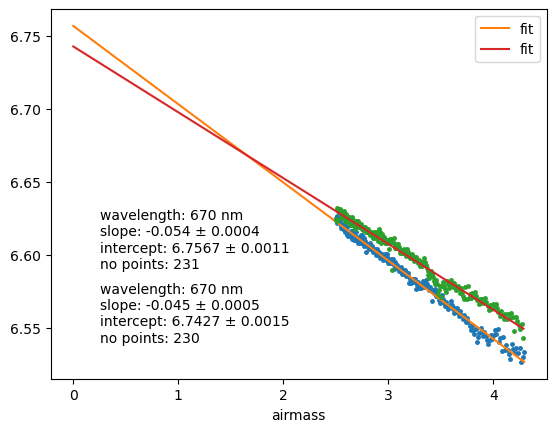

In [24]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

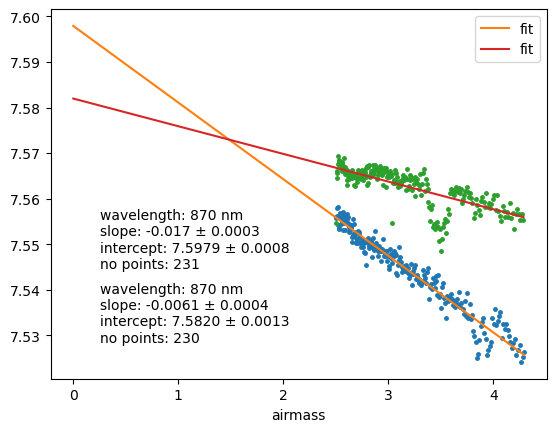

In [25]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

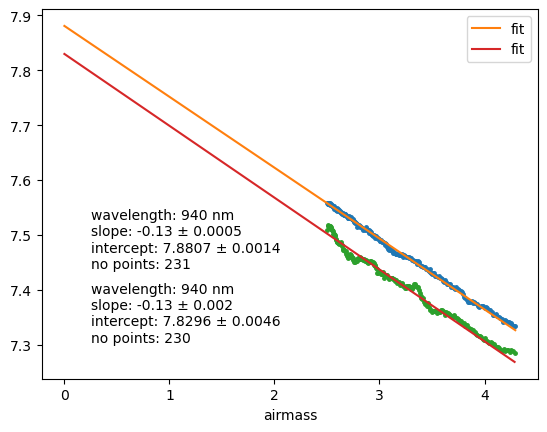

In [26]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

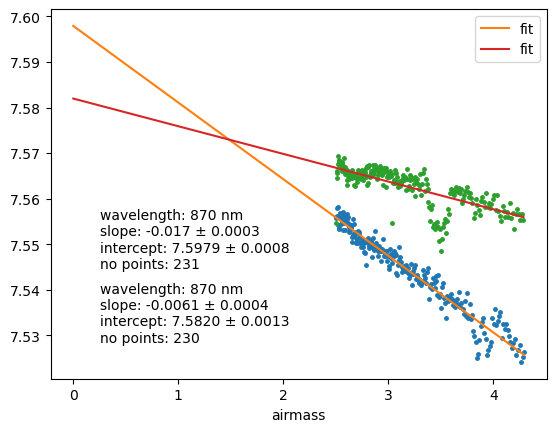

In [27]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

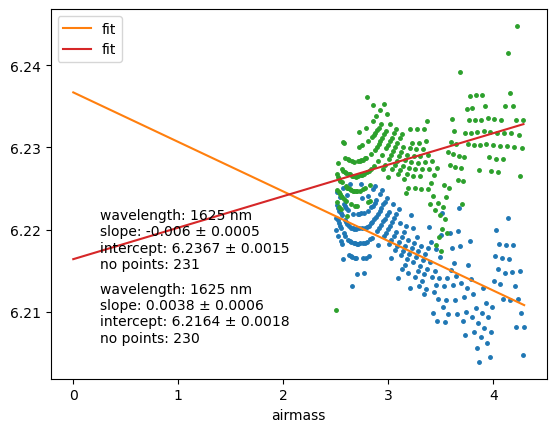

In [28]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [29]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.4/langley_am_frc_649_v0.1_20251018.nc')

In [30]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.4/langley_pm_frc_649_v0.1_20251018.nc')

### 20251017

In [31]:
%matplotlib inline

In [32]:
date = '1017'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

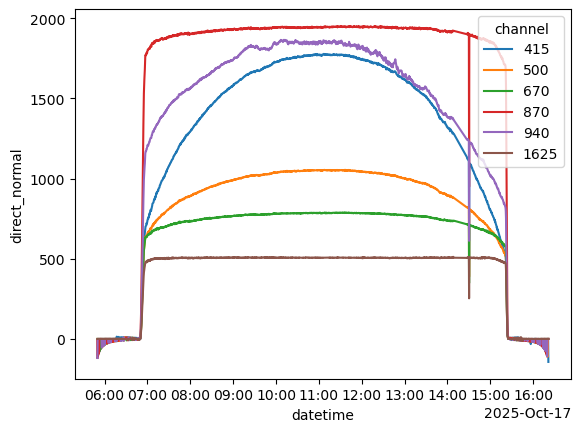

In [33]:
# first glance
f,a = plt.subplots()
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime', ax = a)
# at = a.twinx()
# cm.plot(ax= at)

In [34]:
out = helpers.get_langleys(ds, fnmet, 
                                        None,
                                        # lt,     
                                        langley_airmass_limits=(2.5, 4.3),
                                        clean = False,
                                        # test = True
                                       )
lang_am, lang_pm = out

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


In [35]:
if 0:
    lang_am.langleys = lang_am.langleys.dropna()
    
    lang_am = lang_am.clean(threshold=2.5, 
                  # use_channels=[500,]
                 )['langley']
if 1:
    lang_pm.langleys = lang_pm.langleys.dropna()
    
    lang_pm = lang_pm.clean(threshold=3, 
                  # use_channels=[500,]
                 )['langley']

skewness: -0.0710	 skewscale:3.6392
skewness: 0.1264	 skewscale:4.1380


/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py:861: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  langley.langleys = langley.langleys[where]


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

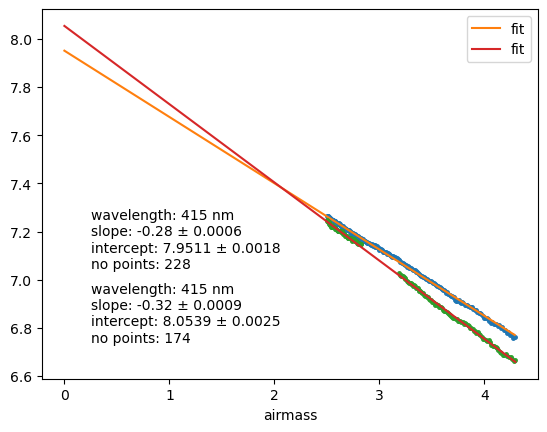

In [36]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, 
             ax = a
            )

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

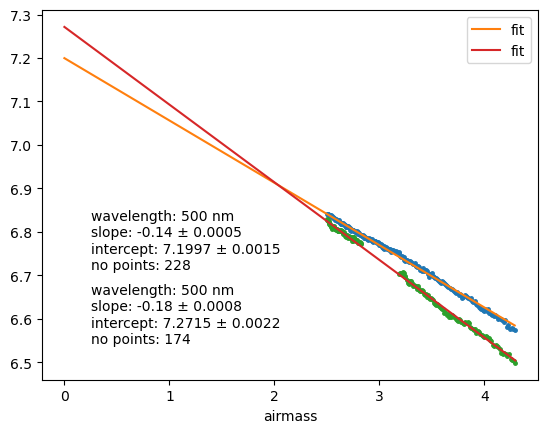

In [37]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

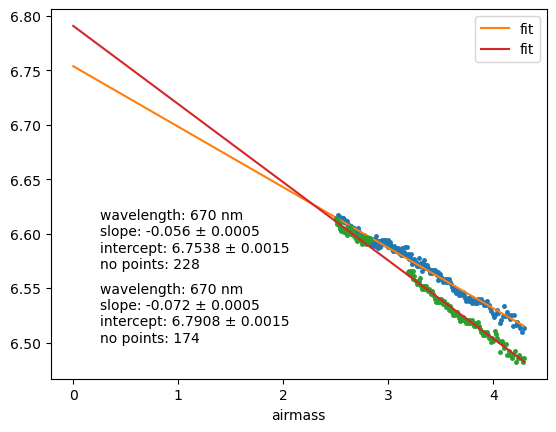

In [38]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

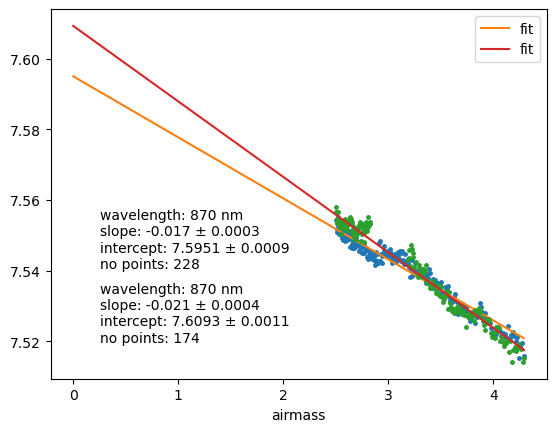

In [39]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

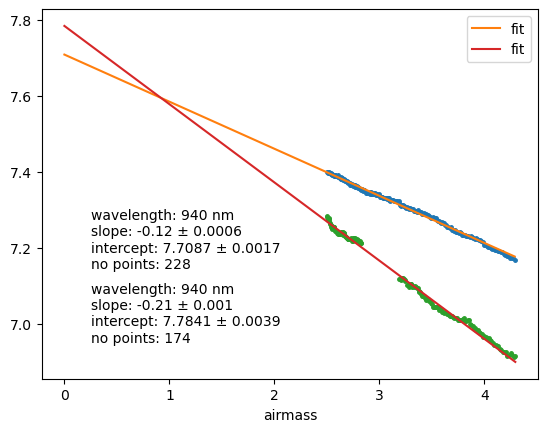

In [40]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

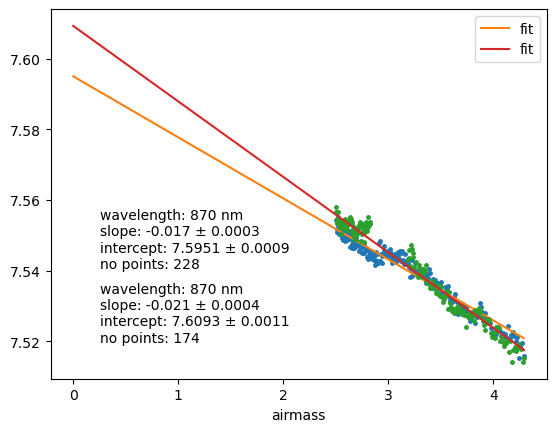

In [41]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

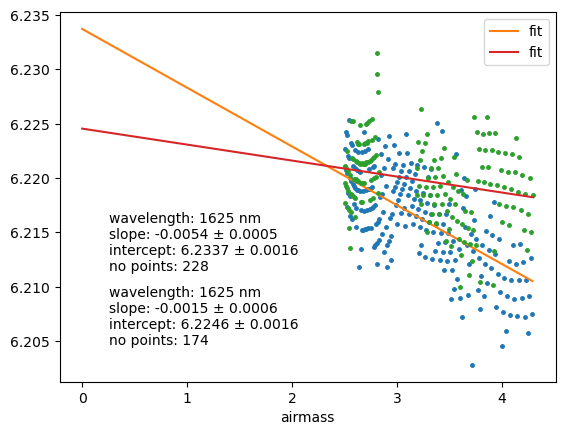

In [42]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [43]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.4/langley_am_frc_649_v0.1_20251017.nc')

In [44]:
# lang = lang_pm
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir(exist_ok=True)
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

### 20251016

In [45]:
%matplotlib inline

In [46]:
date = '1016'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

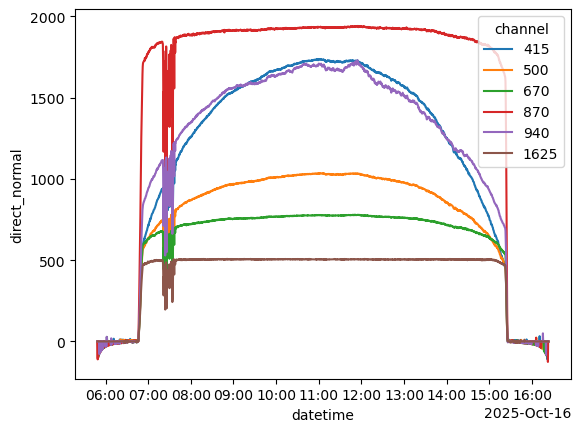

In [47]:
# first glance
f,a = plt.subplots()
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime', ax = a)
# at = a.twinx()
# cm.plot(ax= at)

In [48]:
out = helpers.get_langleys(ds, fnmet, 
                                        None,
                                        # lt,     
                                        langley_airmass_limits=(2.5, 4.3),
                                        clean = False,
                                        # test = True
                                       )
lang_am, lang_pm = out

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


In [49]:
if 1:
    lang_am.langleys = lang_am.langleys.dropna()
    
    lang_am = lang_am.clean(threshold=2.5, 
                  # use_channels=[500,]
                 )['langley']
if 0:
    lang_pm.langleys = lang_pm.langleys.dropna()
    
    lang_pm = lang_pm.clean(threshold=2, 
                  # use_channels=[500,]
                 )['langley']

skewness: -0.1434	 skewscale:3.3961
skewness: -0.1665	 skewscale:3.5409
skewness: -0.1803	 skewscale:3.6267
skewness: -0.2062	 skewscale:3.7885
skewness: -0.2098	 skewscale:3.8112
skewness: -0.2119	 skewscale:3.8241
skewness: -0.2158	 skewscale:3.8487
skewness: -0.2427	 skewscale:4.0169
skewness: -0.2398	 skewscale:3.9988
skewness: -0.2158	 skewscale:3.8485
skewness: -0.1882	 skewscale:3.6765
skewness: -0.1307	 skewscale:3.3166
skewness: -0.0886	 skewscale:3.0539
skewness: -0.0357	 skewscale:2.7233
skewness: 0.0627	 skewscale:2.8920
skewness: 0.0776	 skewscale:2.9849


/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py:861: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  langley.langleys = langley.langleys[where]
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py:861: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  langley.langleys = langley.langleys[where]
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py:861: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  langley.langleys = langley.langleys[where]
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py:861: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  langley.langleys = langley.langleys[where]
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py:861: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  langley.langleys = langley.langleys[wh

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

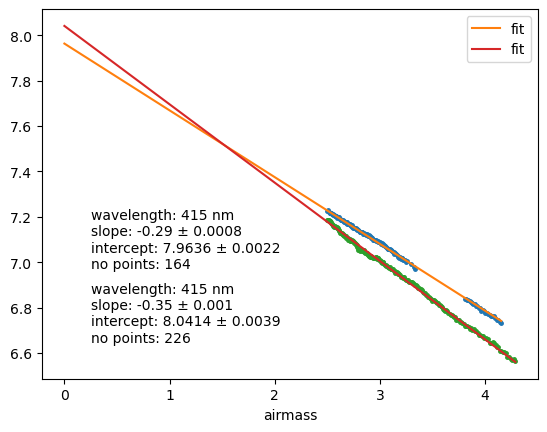

In [50]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, 
             ax = a
            )

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

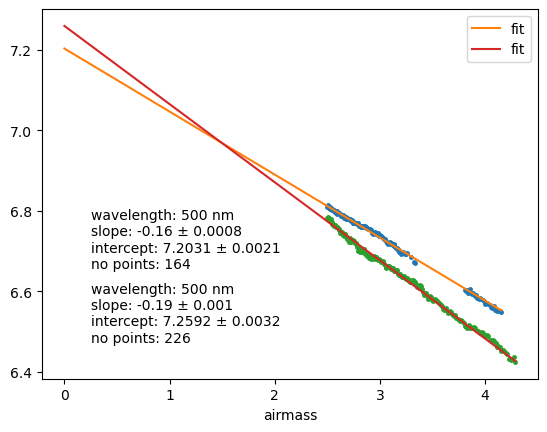

In [51]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

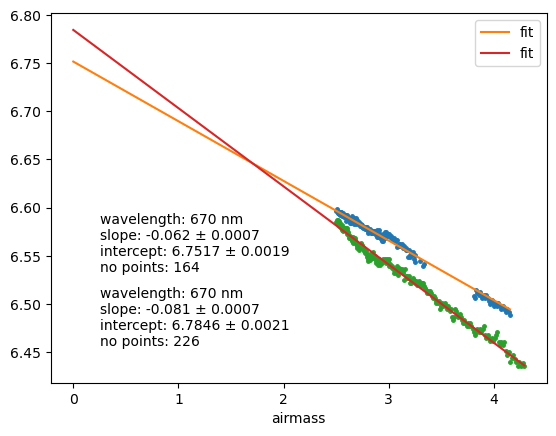

In [52]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

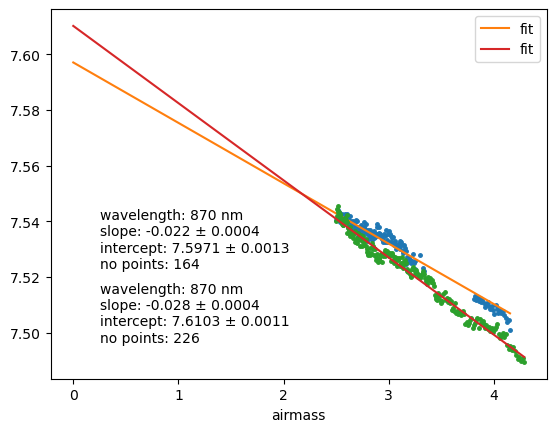

In [53]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

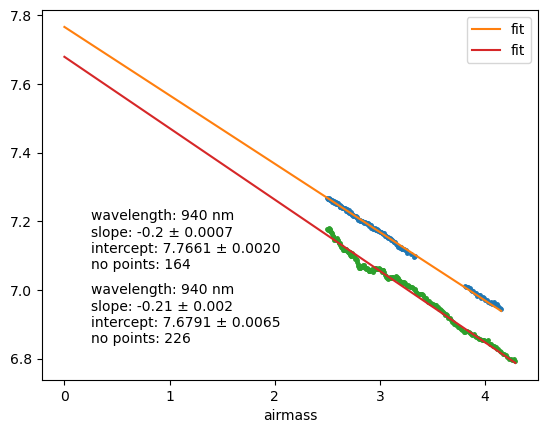

In [54]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

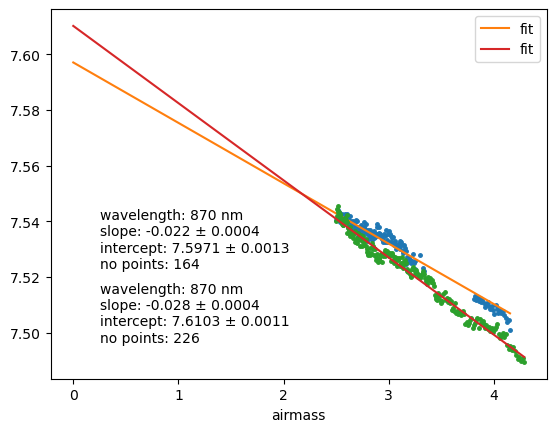

In [55]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

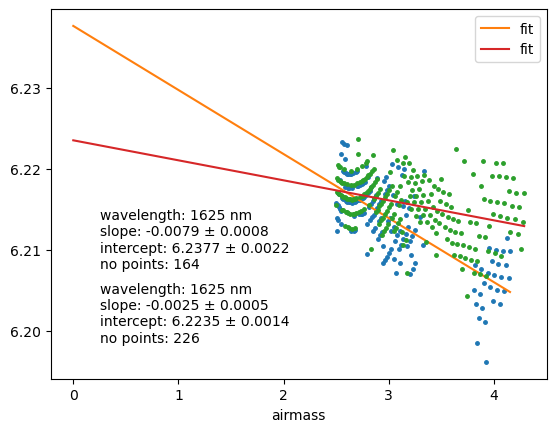

In [56]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [57]:
# lang = lang_am
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir(exist_ok=True, parents=True)
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

In [58]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.4/langley_pm_frc_649_v0.1_20251016.nc')

### 20251015

In [59]:
%matplotlib inline

In [60]:
date = '1015'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

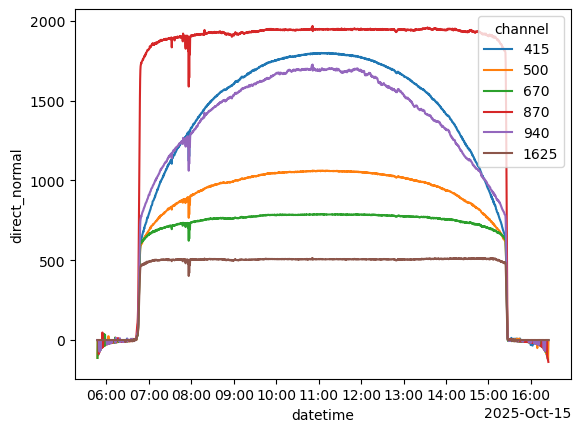

In [61]:
# first glance
f,a = plt.subplots()
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime', ax = a)
# at = a.twinx()
# cm.plot(ax= at)

In [62]:
out = helpers.get_langleys(ds, fnmet, 
                                        None,
                                        # lt,     
                                        langley_airmass_limits=(2.5, 4.3),
                                        clean = False,
                                        # test = True
                                       )
lang_am, lang_pm = out

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


In [63]:
if 1:
    lang_am.langleys = lang_am.langleys.dropna()
    
    lang_am = lang_am.clean(threshold=2, 
                  # use_channels=[500,]
                 )['langley']
if 0:
    lang_pm.langleys = lang_pm.langleys.dropna()
    
    lang_pm = lang_pm.clean(threshold=2, 
                  # use_channels=[500,]
                 )['langley']

/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py:861: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  langley.langleys = langley.langleys[where]
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py:861: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  langley.langleys = langley.langleys[where]
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py:861: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  langley.langleys = langley.langleys[where]
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py:861: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  langley.langleys = langley.langleys[where]
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py:861: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  langley.langleys = langley.langleys[wh

skewness: -0.1726	 skewscale:2.6905
skewness: -0.1650	 skewscale:2.6601
skewness: -0.0413	 skewscale:2.1652
skewness: 0.0219	 skewscale:2.0876
skewness: -0.0689	 skewscale:2.2757
skewness: -0.0725	 skewscale:2.2900
skewness: -0.0684	 skewscale:2.2738
skewness: -0.1158	 skewscale:2.4633
skewness: -0.1219	 skewscale:2.4876
skewness: -0.1181	 skewscale:2.4723


/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py:861: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  langley.langleys = langley.langleys[where]


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

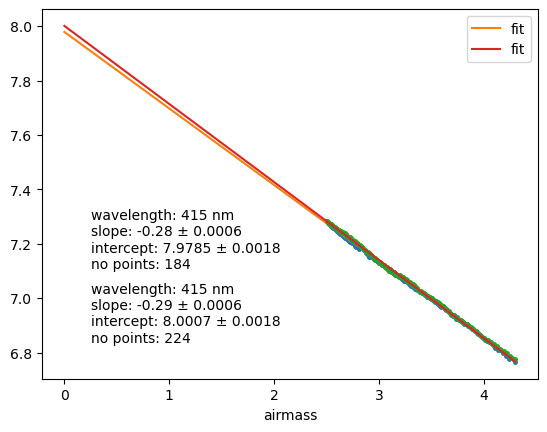

In [64]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, 
             ax = a
            )

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

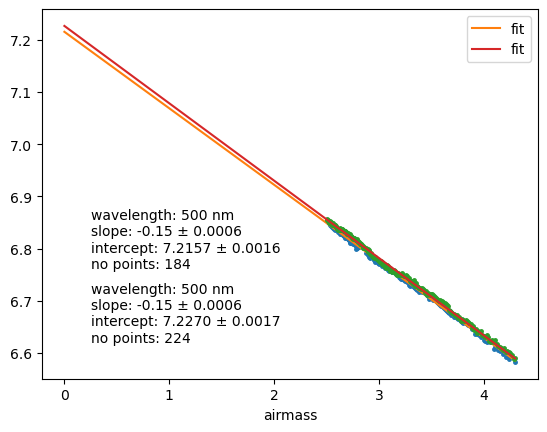

In [65]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

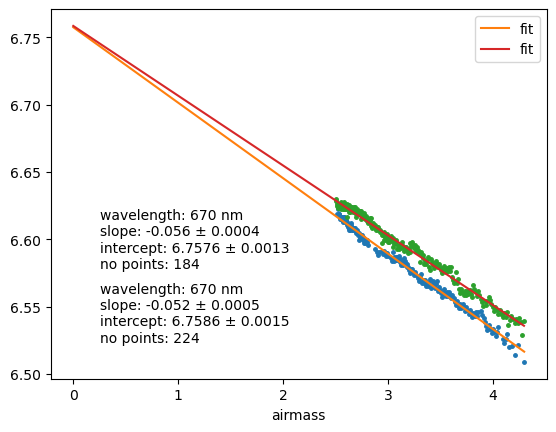

In [66]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

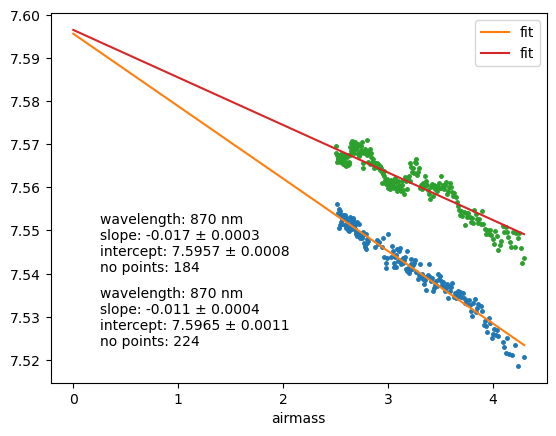

In [67]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

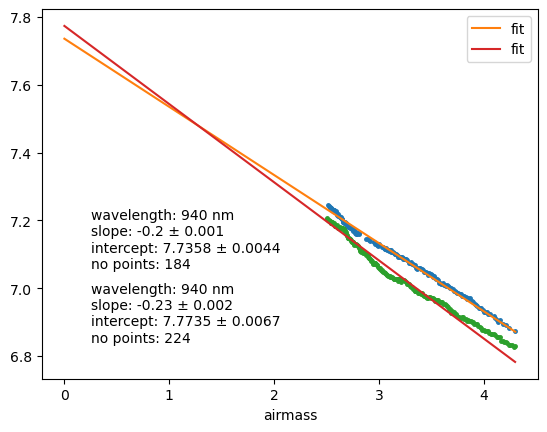

In [68]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

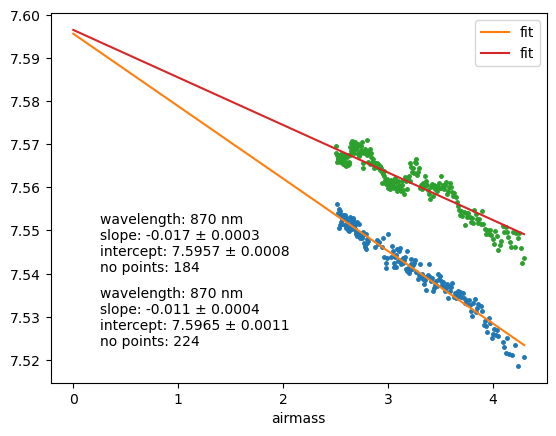

In [69]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

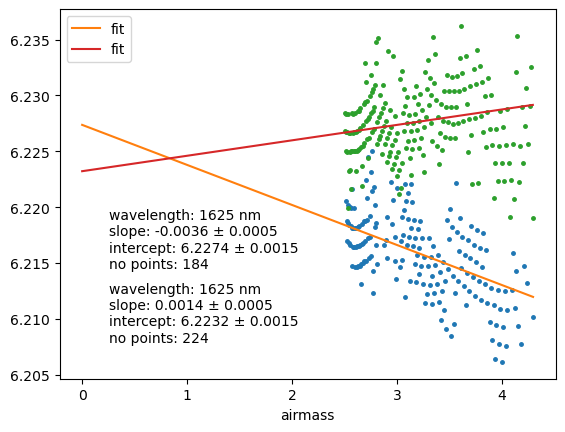

In [70]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [71]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.4/langley_am_frc_649_v0.1_20251015.nc')

In [72]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.4/langley_pm_frc_649_v0.1_20251015.nc')

### 20251014

In [73]:
%matplotlib inline

In [74]:
date = '1014'
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_2025{date}.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_2025{date}_preliminary.nc'

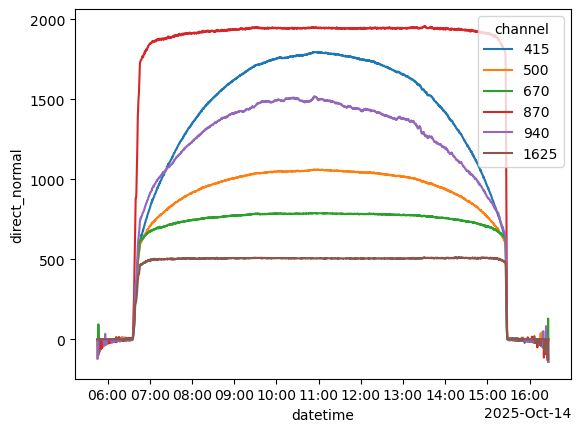

In [75]:
# first glance
f,a = plt.subplots()
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime', ax = a)
# at = a.twinx()
# cm.plot(ax= at)

In [76]:
out = helpers.get_langleys(ds, fnmet, 
                                        None,
                                        # lt,     
                                        langley_airmass_limits=(2.5, 4.3),
                                        clean = False,
                                        # test = True
                                       )
lang_am, lang_pm = out
if 0:
    lang_am.langleys = lang_am.langleys.dropna()
    
    lang_am = lang_am.clean(threshold=2, 
                  # use_channels=[500,]
                 )['langley']
if 0:
    lang_pm.langleys = lang_pm.langleys.dropna()
    
    lang_pm = lang_pm.clean(threshold=2, 
                  # use_channels=[500,]
                 )['langley']

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

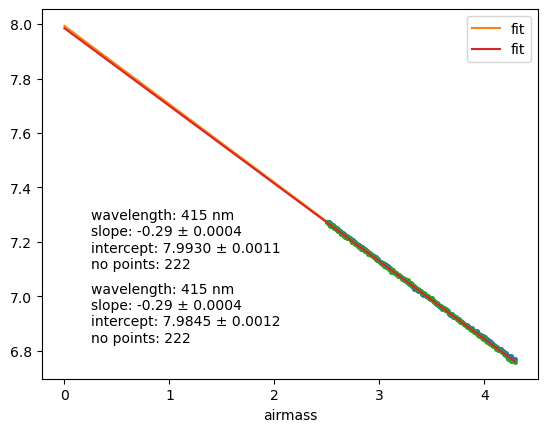

In [77]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, 
             ax = a
            )

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

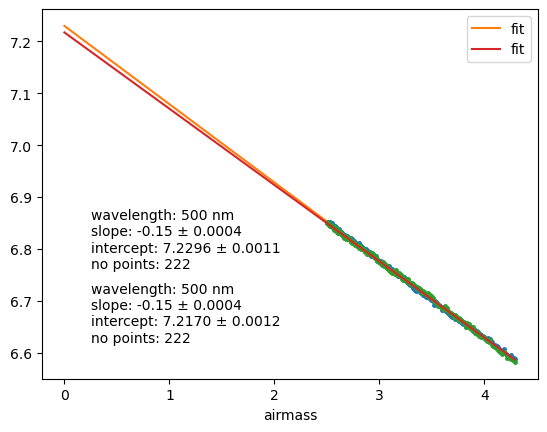

In [78]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

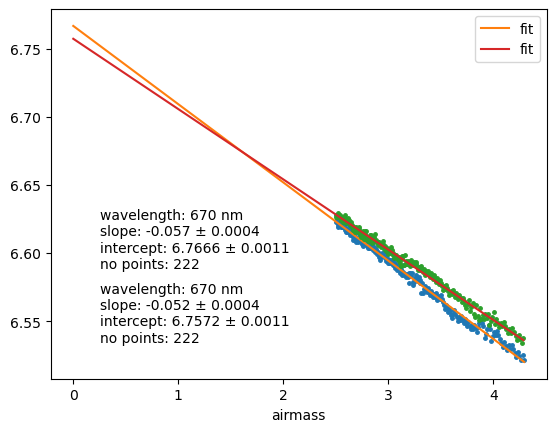

In [79]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

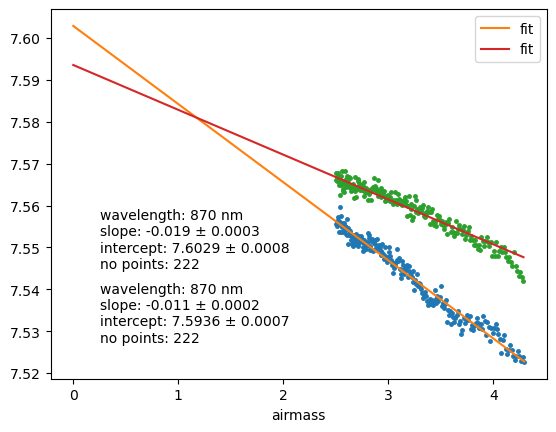

In [80]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

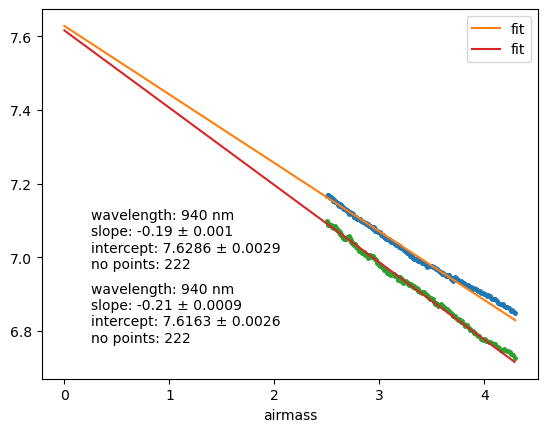

In [81]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

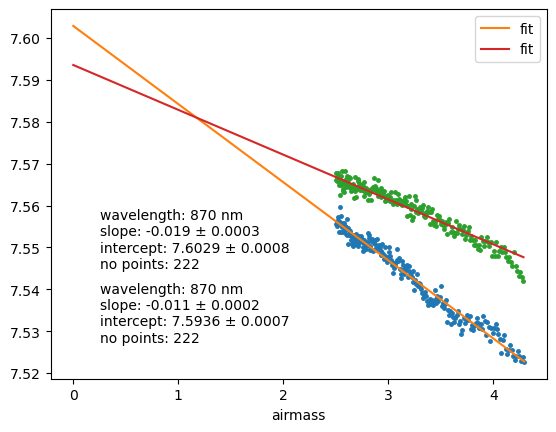

In [82]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

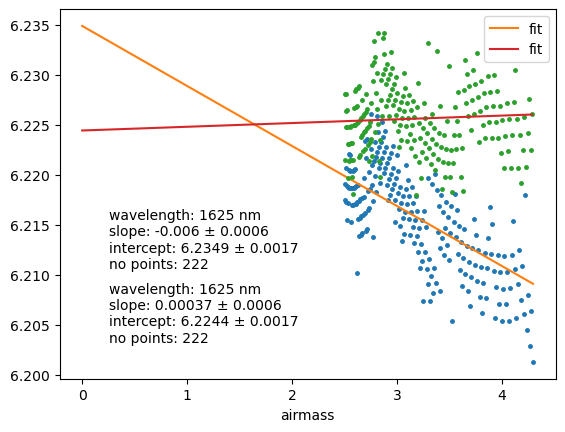

In [83]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [84]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.4/langley_am_frc_649_v0.1_20251014.nc')

In [85]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.4/langley_pm_frc_649_v0.1_20251014.nc')

### 20251013

In [14]:
%matplotlib inline

In [15]:
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20251013.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20251013_preliminary.nc'

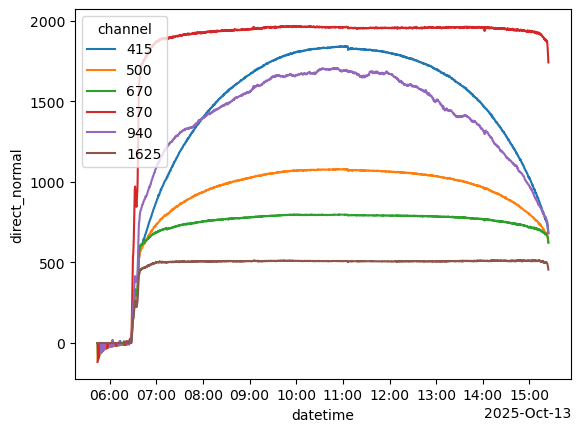

In [16]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [17]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [18]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt, langley_airmass_limits=(2.5, 4.3),)

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/spectral_irradiance.py:1604: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['co2'] = xr.DataArray(np.zeros(tuple(self.dataset.dims[d] for d in ['datetime', 'channel'])),
/Users/htelg/prog/atm-py/atmPy/aerosols/physics/column_optical_properties.py:1108: UserWarning: Michalsky cloudmask may not work well for very low AOD values (<0.02, this values will need to be tested be

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

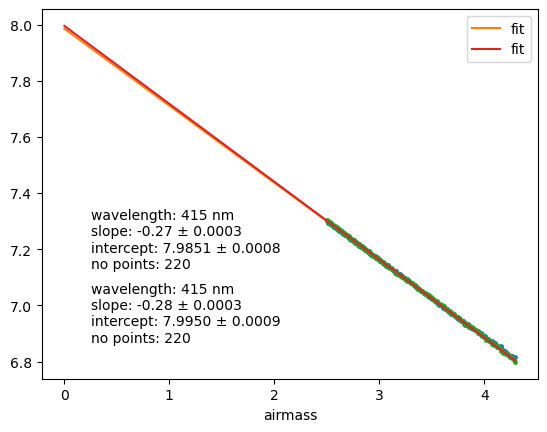

In [19]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

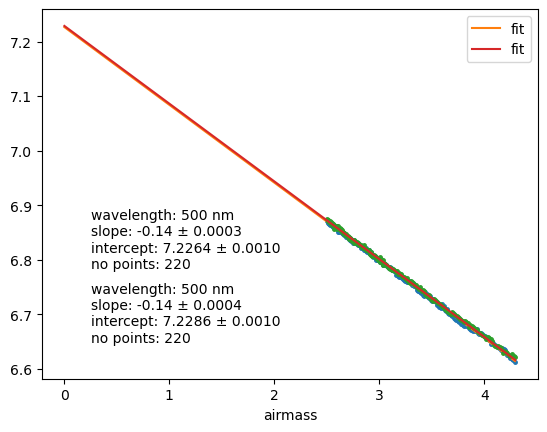

In [20]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

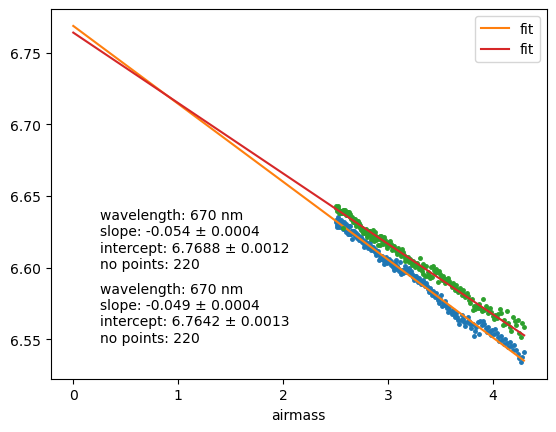

In [21]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

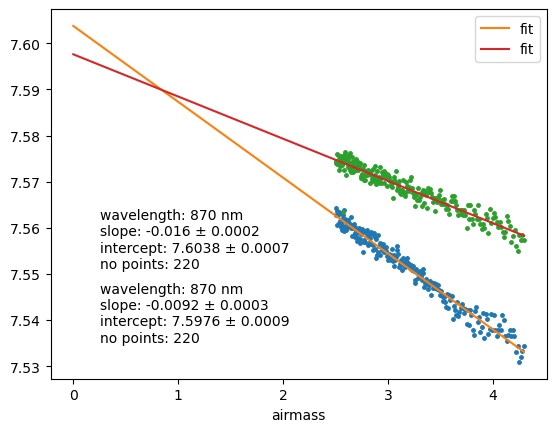

In [22]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

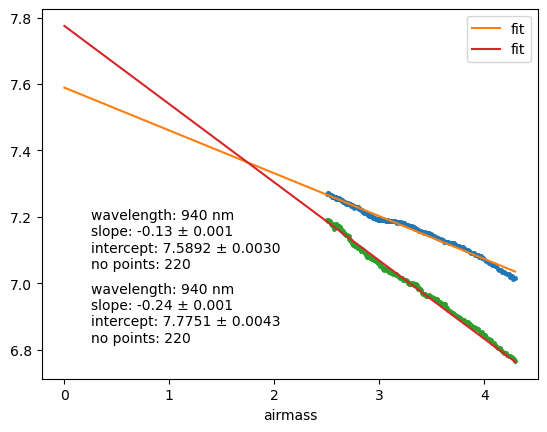

In [23]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

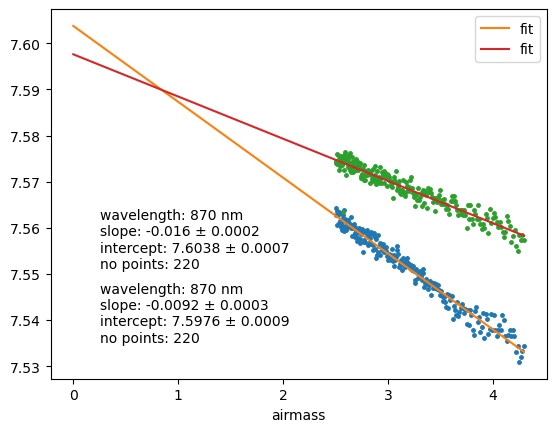

In [24]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

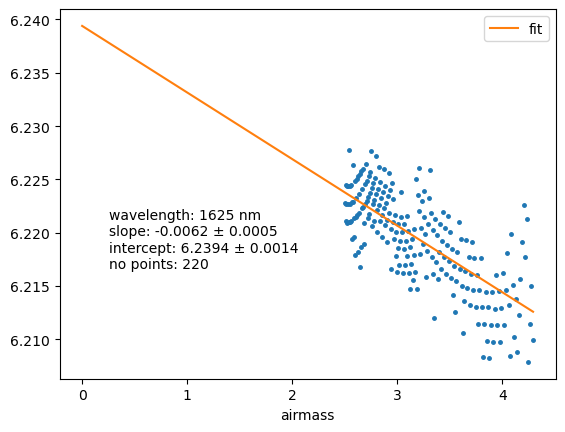

In [25]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [27]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
# p2out.unlink()
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.4/langley_am_frc_649_v0.1_20251013.nc')

In [29]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
# p2out.unlink()
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

File exist!!!


PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.4/langley_pm_frc_649_v0.1_20251013.nc')

### 20251012

In [30]:
%matplotlib inline

In [31]:
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20251012.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20251012_preliminary.nc'

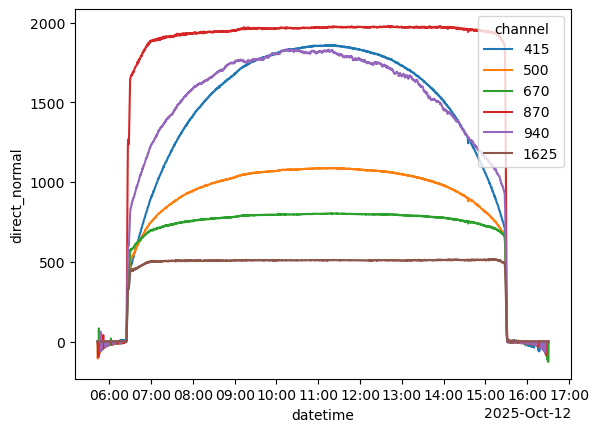

In [32]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [33]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [34]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt, langley_airmass_limits=(2.5, 4.3),)

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/spectral_irradiance.py:1604: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['co2'] = xr.DataArray(np.zeros(tuple(self.dataset.dims[d] for d in ['datetime', 'channel'])),
/Users/htelg/prog/atm-py/atmPy/aerosols/physics/column_optical_properties.py:1108: UserWarning: Michalsky cloudmask may not work well for very low AOD values (<0.02, this values will need to be tested be

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

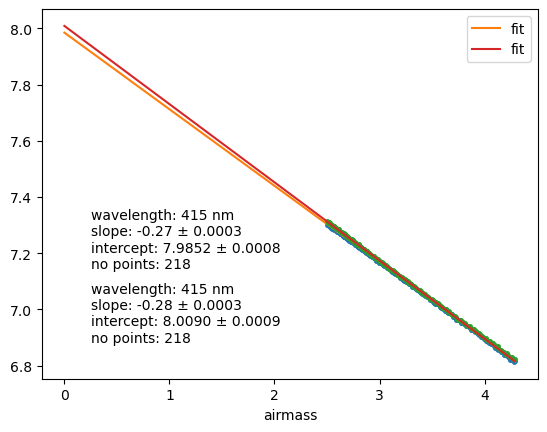

In [35]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

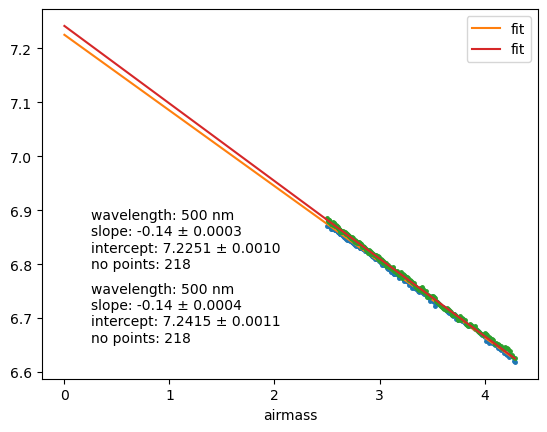

In [36]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

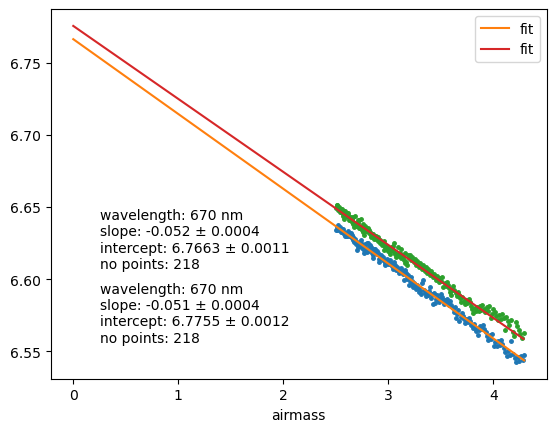

In [37]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

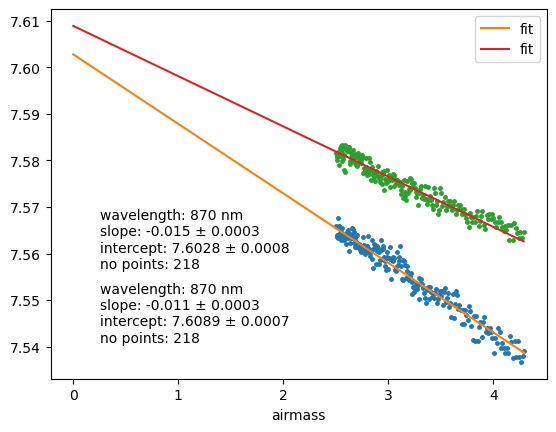

In [38]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

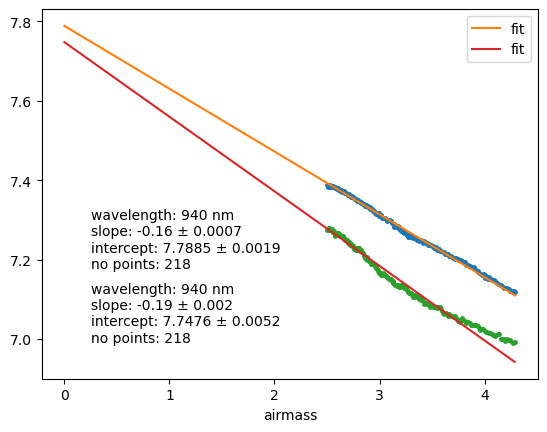

In [39]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

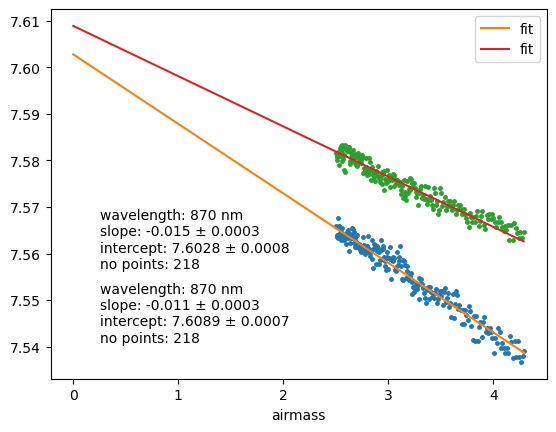

In [40]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

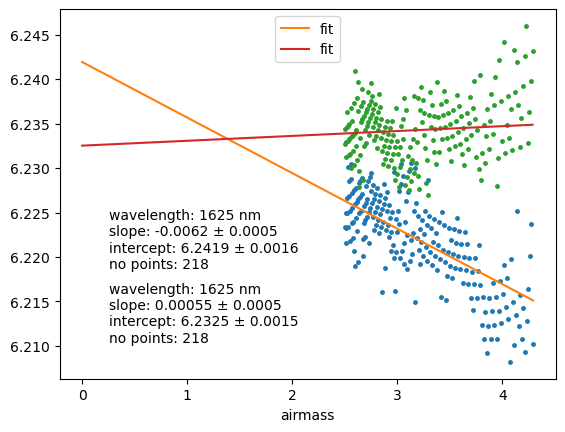

In [41]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [42]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.4/langley_am_frc_649_v0.1_20251012.nc')

In [43]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.4/langley_pm_frc_649_v0.1_20251012.nc')

### 20251011

In [44]:
%matplotlib inline

In [45]:
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20251011.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20251011_preliminary.nc'

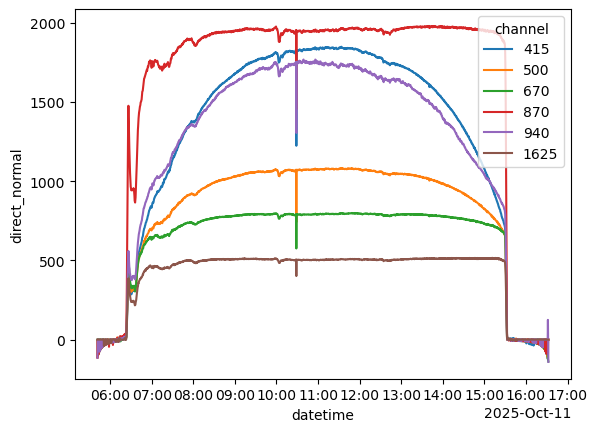

In [46]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [47]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [48]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt, langley_airmass_limits=(2.5, 4.3),)

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/spectral_irradiance.py:1604: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['co2'] = xr.DataArray(np.zeros(tuple(self.dataset.dims[d] for d in ['datetime', 'channel'])),
/Users/htelg/prog/atm-py/atmPy/aerosols/physics/column_optical_properties.py:1108: UserWarning: Michalsky cloudmask may not work well for very low AOD values (<0.02, this values will need to be tested be

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

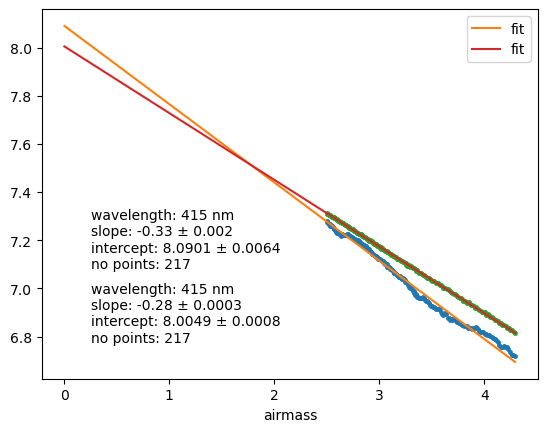

In [49]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

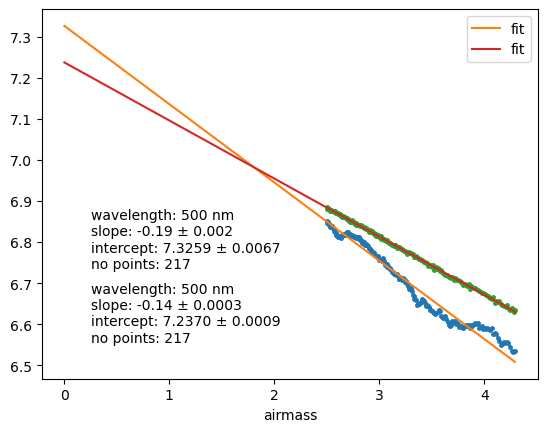

In [50]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

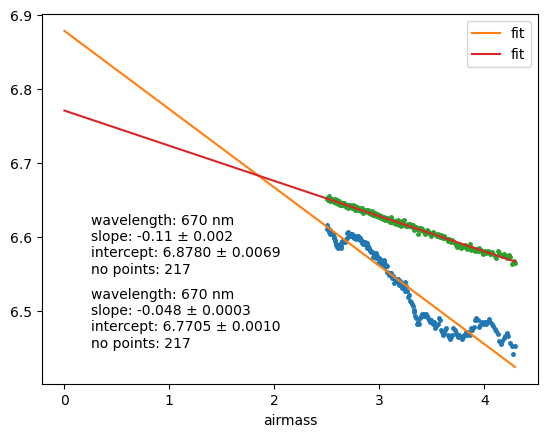

In [51]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

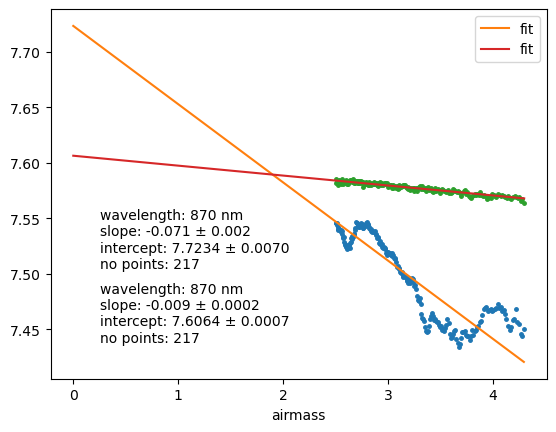

In [52]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

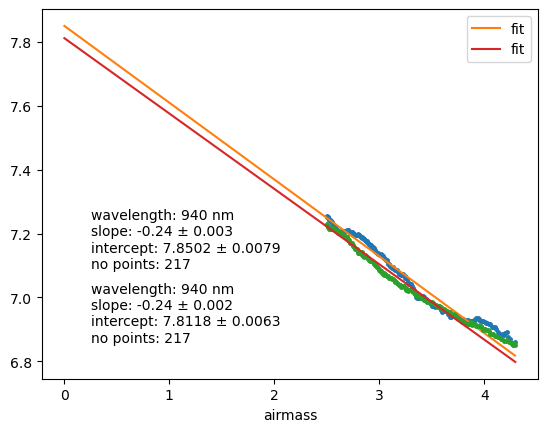

In [53]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

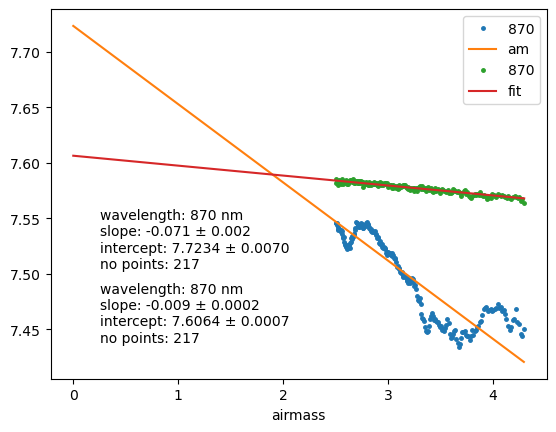

In [54]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
g = a.get_lines()[-1]
g.set_label('am')
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)
a.legend()

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

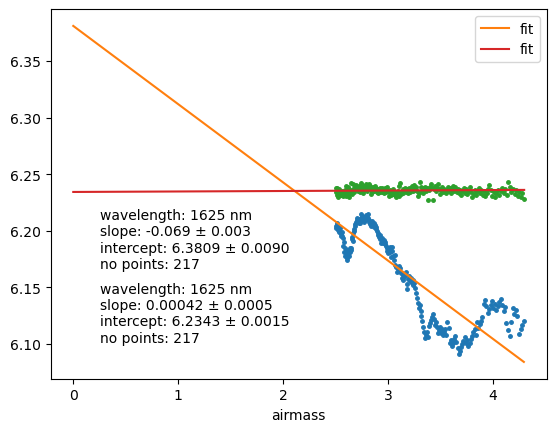

In [55]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [56]:
# lang = lang_am
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir(exist_ok=True)
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

In [57]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.4/langley_pm_frc_649_v0.1_20251011.nc')

### 20251002

In [58]:
%matplotlib inline

In [59]:
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20251002.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20251002_preliminary.nc'

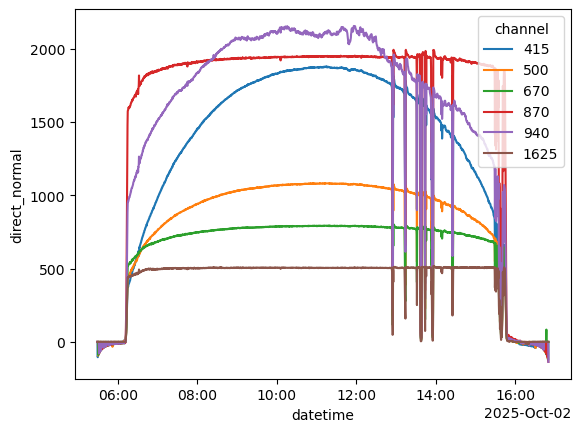

In [60]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [61]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [62]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt, langley_airmass_limits=(2.5, 4.3),)

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/spectral_irradiance.py:1604: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['co2'] = xr.DataArray(np.zeros(tuple(self.dataset.dims[d] for d in ['datetime', 'channel'])),
/Users/htelg/prog/atm-py/atmPy/aerosols/physics/column_optical_properties.py:1108: UserWarning: Michalsky cloudmask may not work well for very low AOD values (<0.02, this values will need to be tested be

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

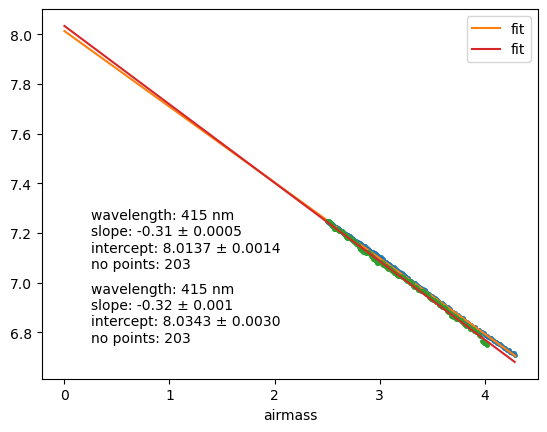

In [63]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

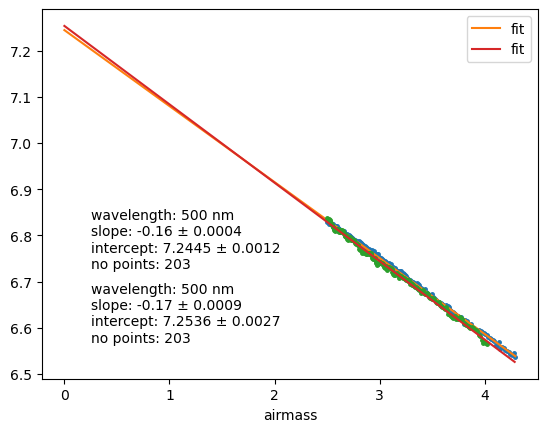

In [64]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

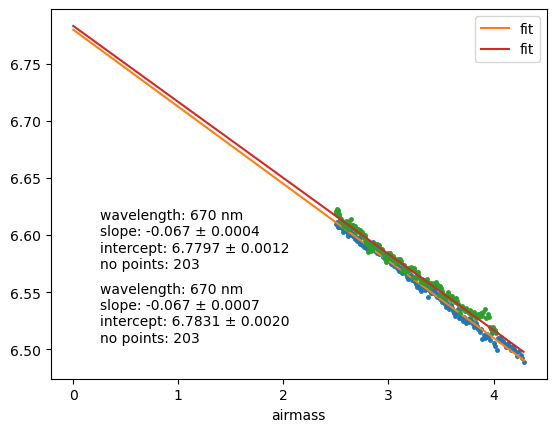

In [65]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

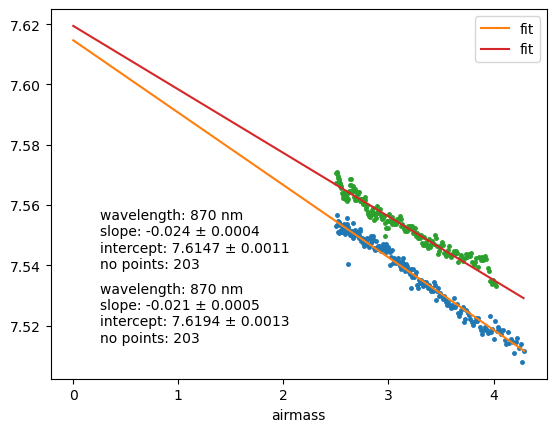

In [66]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

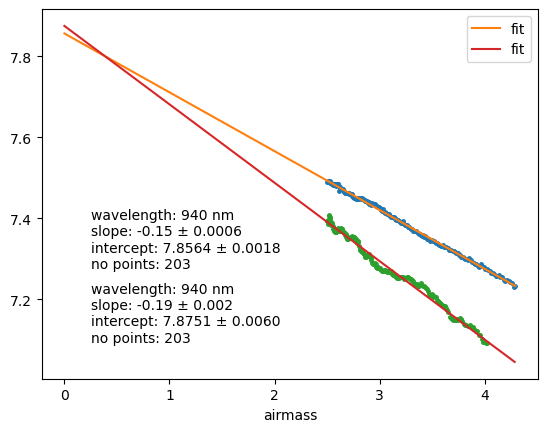

In [67]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

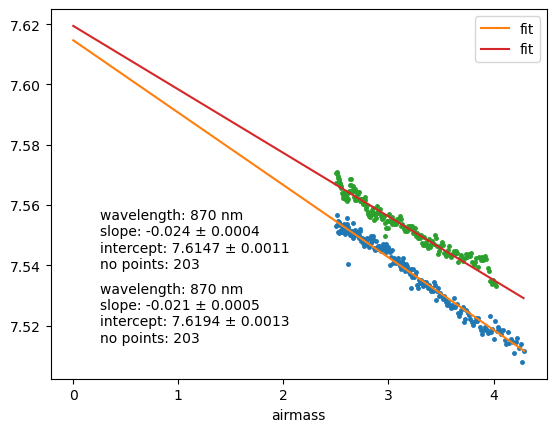

In [68]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

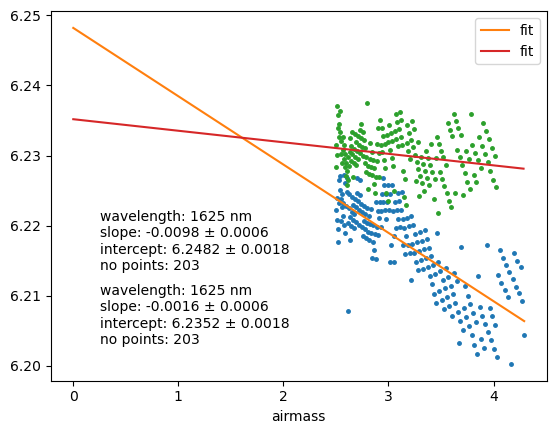

In [69]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [70]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True, parents=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.4/langley_am_frc_649_v0.1_20251002.nc')

In [71]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.4/langley_pm_frc_649_v0.1_20251002.nc')

### 20250929

* met data is short!!

In [72]:
%matplotlib inline

In [73]:
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250929.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20250929_preliminary.nc'

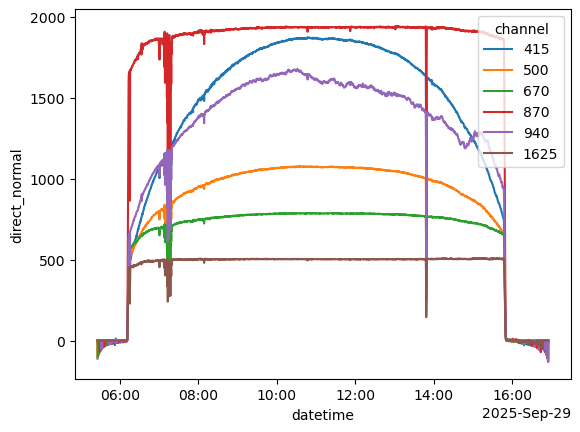

In [74]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [75]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [76]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt, langley_airmass_limits=(2.5, 4.3),)

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/spectral_irradiance.py:1604: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['co2'] = xr.DataArray(np.zeros(tuple(self.dataset.dims[d] for d in ['datetime', 'channel'])),
/Users/htelg/prog/atm-py/atmPy/aerosols/physics/column_optical_properties.py:1108: UserWarning: Michalsky cloudmask may not work well for very low AOD values (<0.02, this values will need to be tested be

In [77]:
lang_pm.langleys.dropna()

Empty DataFrame
Columns: [415, 500, 670, 870, 940, 1625]
Index: []

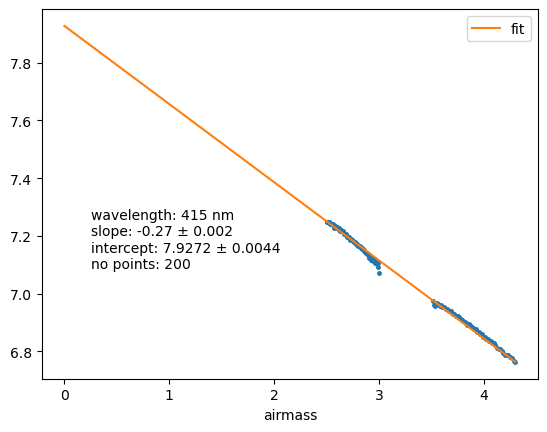

In [78]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

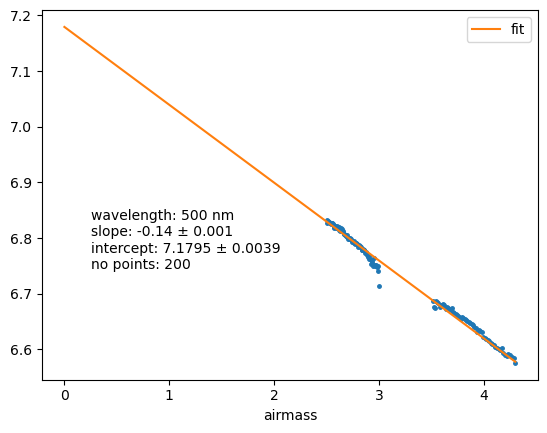

In [79]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

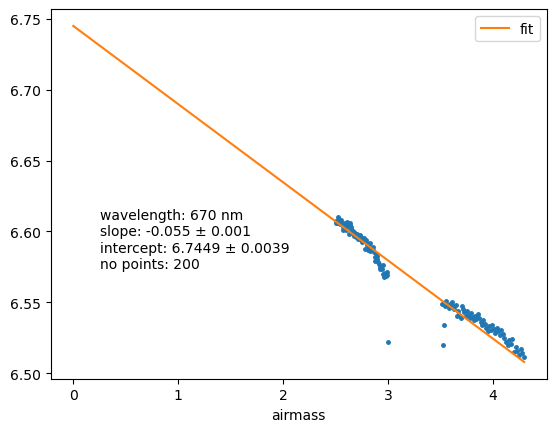

In [80]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

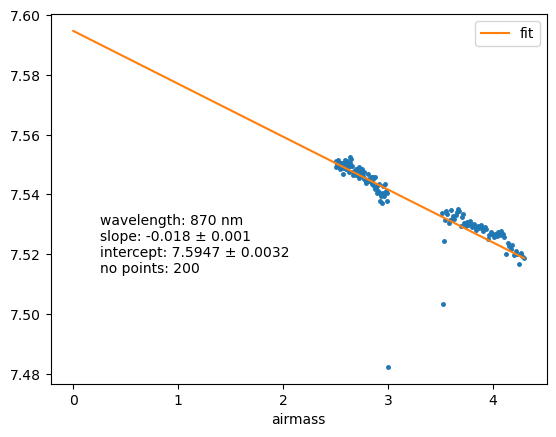

In [81]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

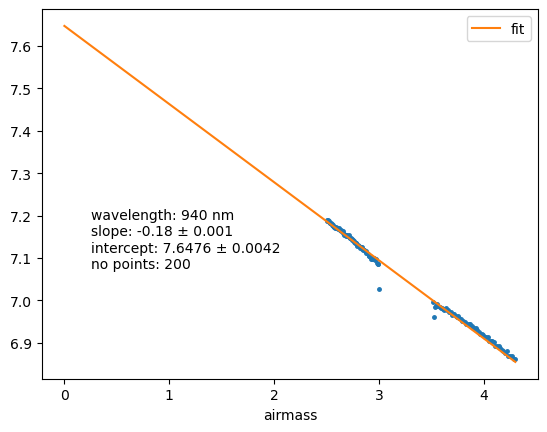

In [82]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

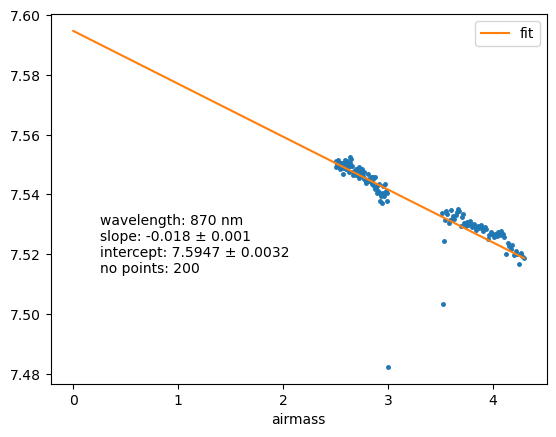

In [83]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

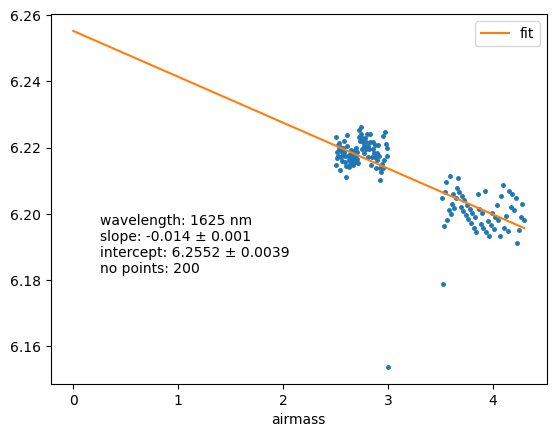

In [84]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
# lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [85]:
# lang = lang_am
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir(exist_ok=True)
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

In [86]:
# lang = lang_pm
# p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
# p2out.parent.mkdir(exist_ok=True)
# if not p2out.is_file():
#     lang.save2netcdf(p2out)
# else:
#     print('File exist!!!')
# p2out    

### 20250928

In [87]:
p2f = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.cal/v0.1/frc_649_v0.1_20250928.nc')
fnmet = f'{prefix}/nfs/grad/campaign/frc/2025/MetaData.netcdf/frc-vi_metadata_20250928_preliminary.nc'

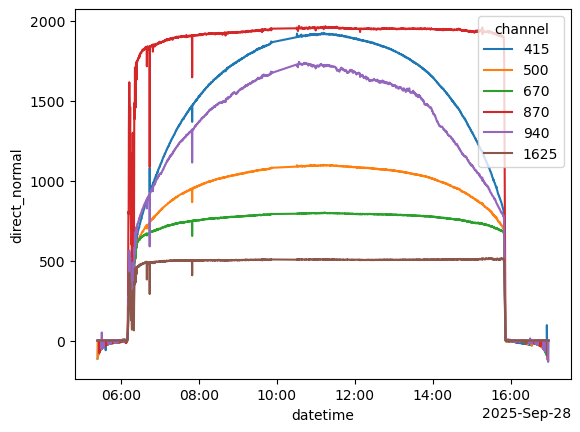

In [88]:
# first glance
ds = xr.open_dataset(p2f)
ds.direct_normal.plot.line(x = 'datetime')

In [89]:
reload(helpers)

<module 'helpers' from '/Users/htelg/projects/cmpaign_2025_PMOD/helpers.py'>

In [99]:
# apply
lang_am, lang_pm = helpers.get_langleys(ds, fnmet, lt, langley_airmass_limits=(2.5, 4.2),)

/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)
/Users/htelg/miniconda3/envs/py12/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/spectral_irradiance.py:1604: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds['co2'] = xr.DataArray(np.zeros(tuple(self.dataset.dims[d] for d in ['datetime', 'channel'])),
/Users/htelg/prog/atm-py/atmPy/aerosols/physics/column_optical_properties.py:1108: UserWarning: Michalsky cloudmask may not work well for very low AOD values (<0.02, this values will need to be tested be

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

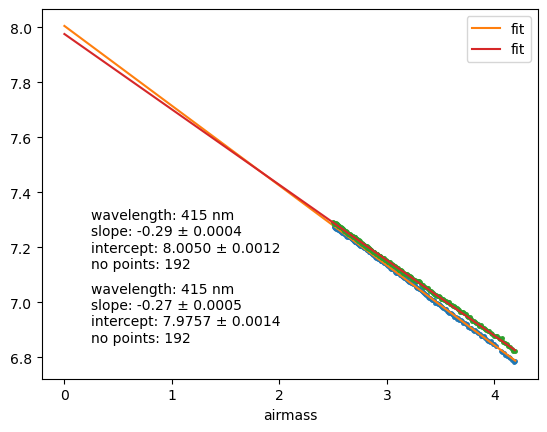

In [100]:
wl = 415
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

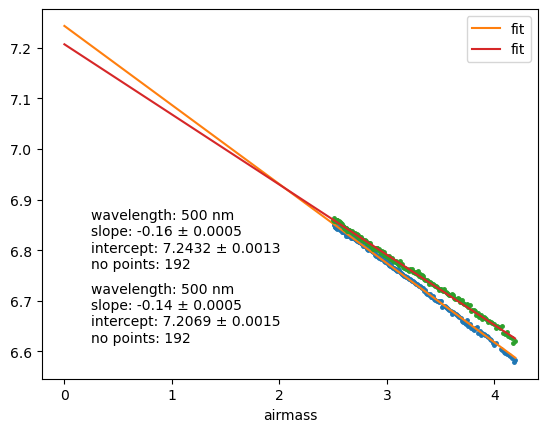

In [101]:
wl = 500
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

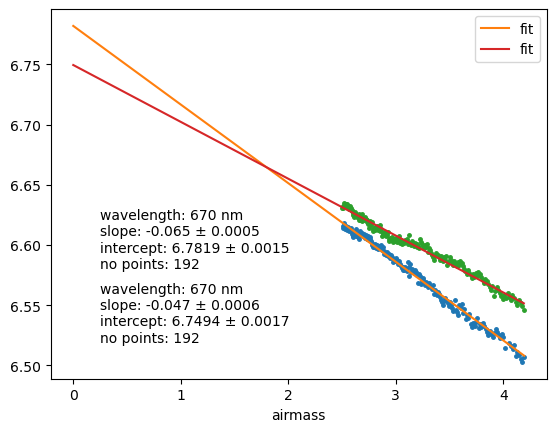

In [102]:
wl = 670
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

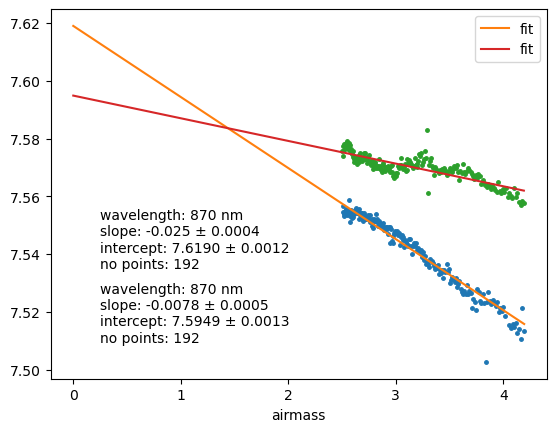

In [103]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

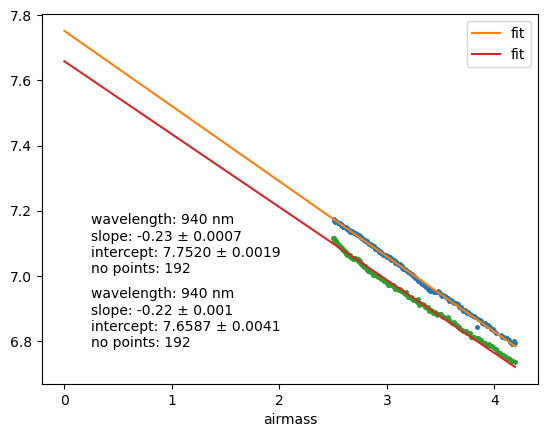

In [104]:
wl = 940
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

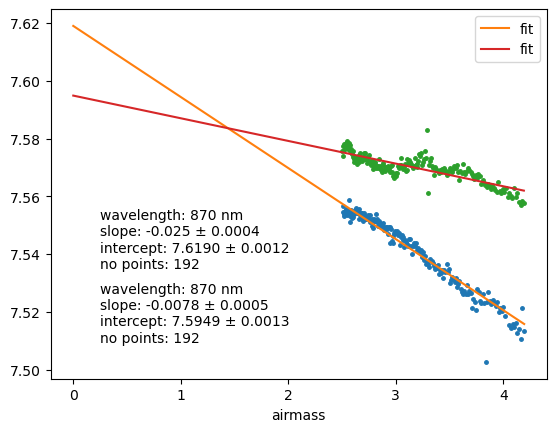

In [105]:
wl = 870
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='airmass'>)

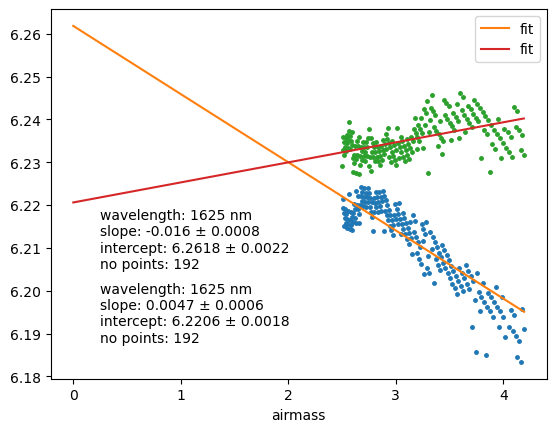

In [106]:
wl = 1625
f,a = lang_am.plot(wavelength=wl, show_pre_clean=False, textpos=[0.1, 0.3])
lang_pm.plot(wavelength = wl, show_pre_clean= False, ax = a)

In [107]:
lang = lang_am
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
# p2out.unlink()
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.4/langley_am_frc_649_v0.1_20250928.nc')

In [109]:
lang = lang_pm
p2out = pl.Path(p2fld_lang.format(serialno = serialno, version = version)).joinpath(f'langley_{lang.when}_{p2f.name}')
p2out.parent.mkdir(exist_ok=True)
# p2out.unlink()
if not p2out.is_file():
    lang.save2netcdf(p2out)
else:
    print('File exist!!!')
p2out    

PosixPath('/Users/htelg/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.4/langley_pm_frc_649_v0.1_20250928.nc')

# Condition langleys

In [110]:
import atmPy.radiation.retrievals.langley_calibration as atmlc


In [111]:
prefix = '/Users/htelg'

In [112]:
reload(atmlc)

<module 'atmPy.radiation.retrievals.langley_calibration' from '/Users/htelg/prog/atm-py/atmPy/radiation/retrievals/langley_calibration.py'>

In [113]:
p2fld = pl.Path(f'{prefix}/nfs/grad/Inst/MFR/Campaign/frc/2025/mfrsr/649.langleys/v0.4/')
lt = atmlc.open_langleys(p2fld)

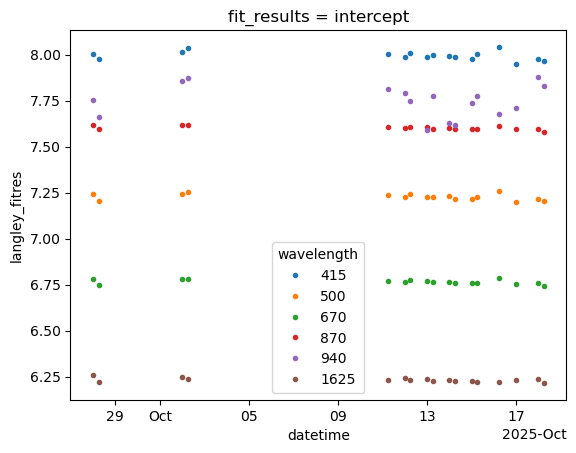

In [114]:
out = lt.dataset.langley_fitres.sel(fit_results = 'intercept').plot.line(x = 'datetime', ls = '', marker = '.')

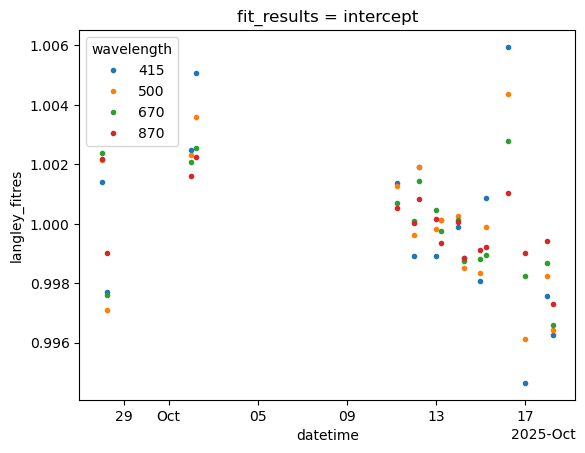

In [115]:
# any sudden steps?
bla = lt.dataset.langley_fitres.sel(fit_results = 'intercept', wavelength = [415, 500, 670, 870])
bla /= bla.mean('datetime')
out = bla.plot.line(x = 'datetime', ls = '', marker = '.')

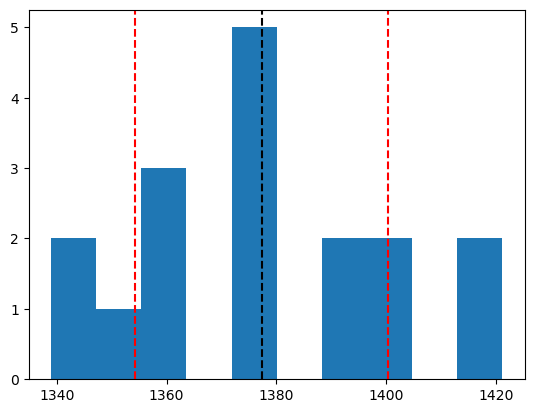

In [116]:
f,a = plt.subplots()
v0s = lt.dataset.langley_fitres.sel(wavelength = 500, fit_results = 'intercept')
v0s = np.exp(v0s)
a.hist(v0s, bins = 10)
a.axvline(v0s.mean(), ls = '--', color = 'black')
a.axvline(v0s.mean() + v0s.std(), ls = '--', color = 'red')
a.axvline(v0s.mean() - v0s.std(), ls = '--', color = 'red')

# remove outliers

In [117]:
import copy

# at individual stderr

In [118]:
lttrunc = copy.deepcopy(lt)
ds = lttrunc.dataset
# remove largest stderr
stderr = ds.langley_fitres.sel(fit_results = 'intercept_stderr')
lttrunc.dataset['langley_fitres'] = ds.langley_fitres.where(stderr < stderr.quantile(0.9, dim = 'datetime'))

# remove outliers based on quantiles
ds = lttrunc.dataset
interc = ds.langley_fitres.sel(fit_results = 'intercept')
where = np.logical_and(interc.quantile(0.1, dim = 'datetime') < interc, interc < interc.quantile(0.9, dim = 'datetime'))
lttrunc.dataset['langley_fitres'] = ds.langley_fitres.where(where)

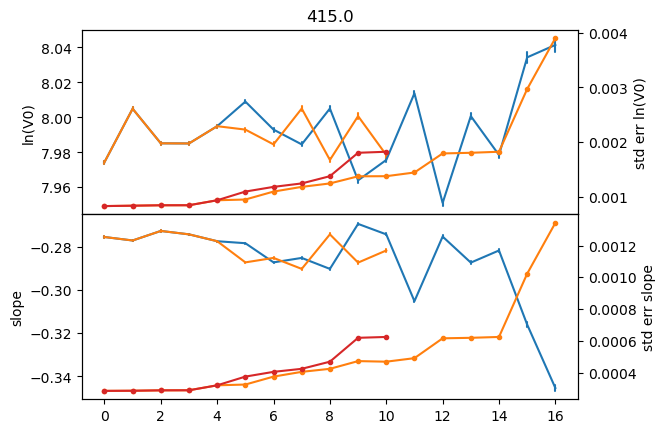

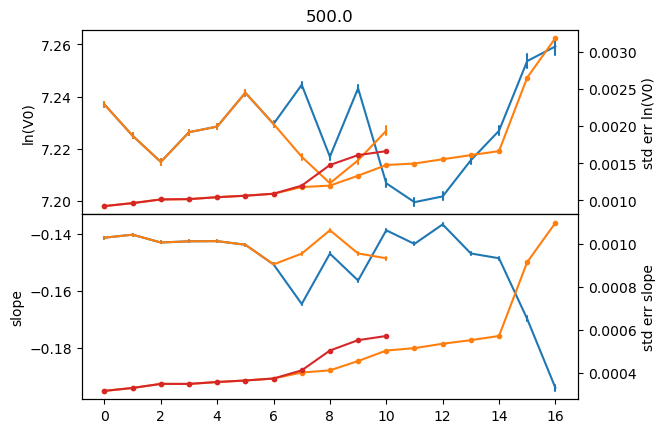

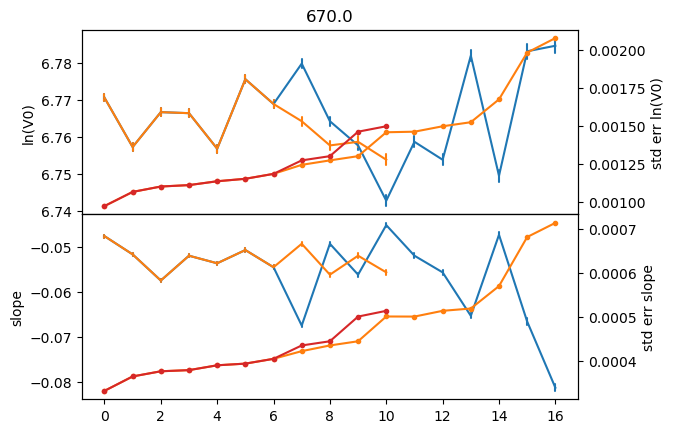

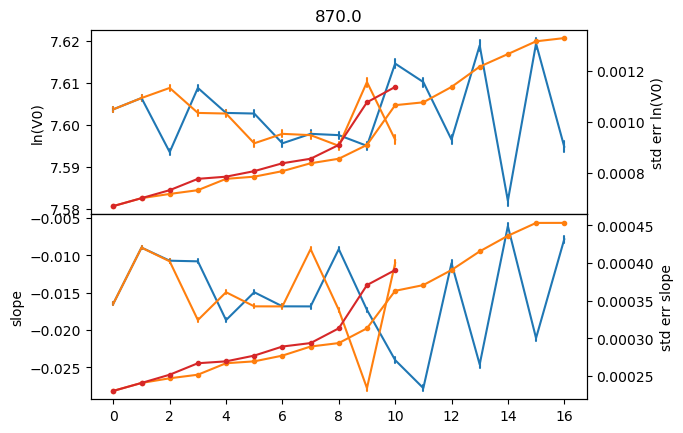

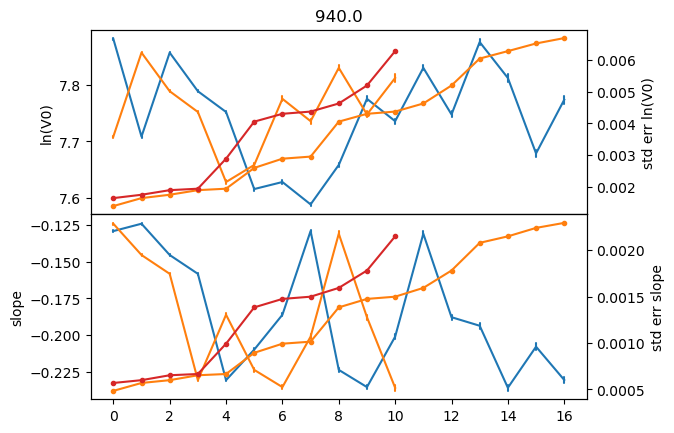

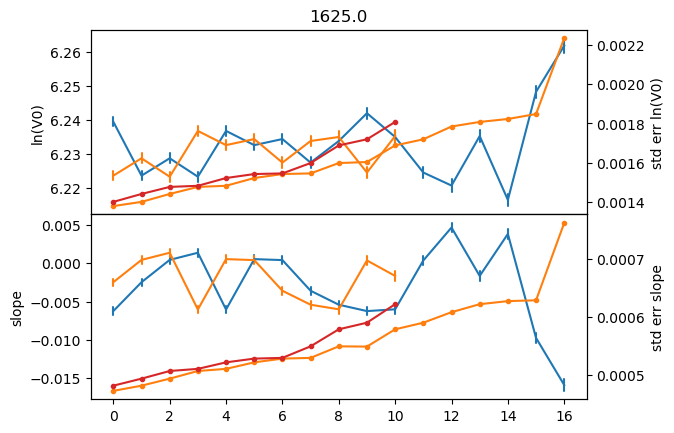

In [119]:
# all sorted by the stderr of the individual channel
wls = lt.dataset.wavelength
for wl in wls:
    f,aa = lt.plot_sorted(wl = wl, wlsort=wl)
    f,aa = lttrunc.plot_sorted(wl = wl, wlsort=wl, aa = aa)
    # aa
    aa[0].set_title(float(wl))

In [120]:
lt.V0_simple.OD_uncertainty

<xarray.DataArray 'OD_uncertainty' (wavelength: 6)> Size: 48B
array([0.03822429, 0.02953035, 0.02255889, 0.01902823, 0.13185572,
       0.02070612])
Coordinates:
  * wavelength  (wavelength) int64 48B 415 500 670 870 940 1625
Attributes:
    description:  (V0_std / V0 * osub) + 0.005. osub: one-sided upper bound f...

In [121]:
lttrunc.V0_simple.V0_std/lttrunc.V0_simple.V0

<xarray.DataArray (wavelength: 6)> Size: 48B
array([0.01119259, 0.01015127, 0.00692768, 0.00540771, 0.06875275,
       0.00509946])
Coordinates:
  * wavelength  (wavelength) int64 48B 415 500 670 870 940 1625
    quantile    float64 8B 0.9
Attributes:
    description:  nbiased standard deviation, ddof = 1

In [122]:
lttrunc.V0_simple.OD_uncertainty

<xarray.DataArray 'OD_uncertainty' (wavelength: 6)> Size: 48B
array([0.02283061, 0.02117171, 0.01603629, 0.01361488, 0.11452808,
       0.0131238 ])
Coordinates:
  * wavelength  (wavelength) int64 48B 415 500 670 870 940 1625
    quantile    float64 8B 0.9
Attributes:
    description:  (V0_std / V0 * osub) + 0.005. osub: one-sided upper bound f...

In [123]:
lttrunc.V0_simple

<xarray.Dataset> Size: 344B
Dimensions:                              (wavelength: 6)
Coordinates:
  * wavelength                           (wavelength) int64 48B 415 500 ... 1625
    quantile                             float64 8B 0.9
Data variables:
    V0                                   (wavelength) float64 48B 2.949e+03 ....
    V0_std                               (wavelength) float64 48B 33.01 ... 2.59
    no_langleys                          (wavelength) int64 48B 11 11 ... 11 11
    one_sided_upper_bound_factor_95conf  (wavelength) float64 48B 1.593 ... 1...
    OD_uncertainty                       (wavelength) float64 48B 0.02283 ......
    V0_stderr                            (wavelength) float64 48B 0.001163 .....

In [126]:
p2f = pl.Path().resolve() / 'data/V0_simple_649_v0.4.nc'
# p2f.unlink()
if p2f.exists():
    print(f'File already exists: {p2f}')
else:
    lttrunc.V0_simple.to_netcdf(p2f)
    print(f'Saved to {p2f}')

Saved to /Users/htelg/projects/cmpaign_2025_PMOD/data/V0_simple_649_v0.4.nc


In [125]:
pl.Path().resolve() / f'data/V0_simple_{serialno}_v{version}.nc'

PosixPath('/Users/htelg/projects/cmpaign_2025_PMOD/data/V0_simple_649_v0.4.nc')

In [187]:
serialno

649